In [1]:
from support import *

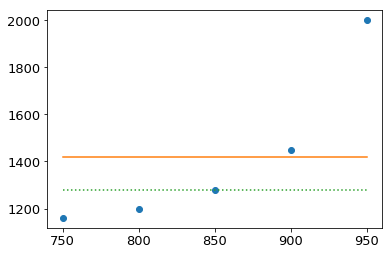

In [2]:
df = data()
df_l2 = df.copy()
df_l1 = df.copy()
plt.plot(df.sqfeet,df.rent,'o')

m = df.rent.mean()
mm = np.empty(len(df))
mm.fill(m)
plt.plot(df.sqfeet,mm)

md = df.rent.median()
md2 = np.empty(len(df))
md2.fill(md)
plt.plot(df.sqfeet,md2, linestyle=':')
plt.show()

## Show decision tree for L2 residual

In [3]:
eta = 1.0
M = 3
gbm_l2 = l2boost(df_l2, 'rent', eta, M)
print(gbm_l2.splits())
mse = np.array([mean_squared_error(df_l2.rent, df_l2['F'+str(s)]) for s in range(M+1)])
mse_sqrt = np.array(np.sqrt([mean_squared_error(df_l2.rent, df_l2['F'+str(s)]) for s in range(M+1)]))
mae = np.array([mean_absolute_error(df_l2.rent, df_l2['F'+str(s)]) for s in range(M+1)])
np.set_printoptions(precision=3)
print(mse)
print(mse_sqrt)
print(mae)

df_l2

[925.0, 825.0, 925.0]
[94576.     9895.     4190.833  3240.139]
[307.532  99.474  64.737  56.922]
[245.6    74.     54.333  42.   ]


,sqfeet,rent,F0,res1,delta1,F1,res2,delta2,F2,res3,delta3,F3
0,750,1160,1418.0,-258.0,-145.5,1272.5,-112.5,-92.500000,1180.000000,-20.000000,15.416667,1195.416667
1,800,1200,1418.0,-218.0,-145.5,1272.5,-72.5,-92.500000,1180.000000,20.000000,15.416667,1195.416667
2,850,1280,1418.0,-138.0,-145.5,1272.5,7.5,61.666667,1334.166667,-54.166667,15.416667,1349.583333
3,900,1450,1418.0,32.0,-145.5,1272.5,177.5,61.666667,1334.166667,115.833333,15.416667,1349.583333
4,950,2000,1418.0,582.0,582.0,2000.0,0.0,61.666667,2061.666667,-61.666667,-61.666667,2000.000000


In [4]:
F = df_l2[['sqfeet','rent','F0','F1','F2','F3']]
for i in range(len(F)):
    print("&", " & ".join([f"{int(v)}" for v in F.iloc[i,0:6]]), r"\\")

print(" & ".join(f"{q:.1f}" for q in mse))
print(" & ".join(f"{q:.0f}" for q in mae))

& 750 & 1160 & 1418 & 1272 & 1180 & 1195 \\
& 800 & 1200 & 1418 & 1272 & 1180 & 1195 \\
& 850 & 1280 & 1418 & 1272 & 1334 & 1349 \\
& 900 & 1450 & 1418 & 1272 & 1334 & 1349 \\
& 950 & 2000 & 1418 & 2000 & 2061 & 2000 \\
94576.0 & 9895.0 & 4190.8 & 3240.1
246 & 74 & 54 & 42


In [5]:
eta = 1.0
M = 3
gbm_l1 = l1boost(df_l1, 'rent', eta, M)
print(gbm_l1.splits())
mse = np.array([mean_squared_error(df_l1.rent, df_l1['F'+str(s)]) for s in range(M+1)])
mse_sqrt = np.array(np.sqrt([mean_squared_error(df_l1.rent, df_l1['F'+str(s)]) for s in range(M+1)]))
mae = np.array([mean_absolute_error(df_l1.rent, df_l1['F'+str(s)]) for s in range(M+1)])
print(mse)
print(mse_sqrt)
print(mae)
df_l1

[825.0, 775.0, 925.0]
[113620.  66440.  64840.   6180.]
[337.076 257.76  254.637  78.613]
[218. 152. 148.  40.]


,sqfeet,rent,F0,res1,sign1,delta1,F1,res2,sign2,delta2,F2,res3,sign3,delta3,F3
0,750,1160,1280.0,-120.0,-1.0,-100.0,1180.0,-20.0,-1.0,-20.0,1160.0,0.0,0.0,-5.0,1155.0
1,800,1200,1280.0,-80.0,-1.0,-100.0,1180.0,20.0,1.0,10.0,1190.0,10.0,1.0,-5.0,1185.0
2,850,1280,1280.0,0.0,0.0,170.0,1450.0,-170.0,-1.0,10.0,1460.0,-180.0,-1.0,-5.0,1455.0
3,900,1450,1280.0,170.0,1.0,170.0,1450.0,0.0,0.0,10.0,1460.0,-10.0,-1.0,-5.0,1455.0
4,950,2000,1280.0,720.0,1.0,170.0,1450.0,550.0,1.0,10.0,1460.0,540.0,1.0,540.0,2000.0


In [6]:
F = df_l1[['sqfeet','rent','F0','F1','F2','F3']]
for i in range(len(F)):
    print("&",  " & ".join([f"{int(v)}" for v in F.iloc[i,0:6]]), r"\\")
    
print(" & ".join(f"{q:.0f}" for q in mse))
print(" & ".join(f"{q:.0f}" for q in mae))

& 750 & 1160 & 1280 & 1180 & 1160 & 1155 \\
& 800 & 1200 & 1280 & 1180 & 1190 & 1185 \\
& 850 & 1280 & 1280 & 1450 & 1460 & 1455 \\
& 900 & 1450 & 1280 & 1450 & 1460 & 1455 \\
& 950 & 2000 & 1280 & 1450 & 1460 & 2000 \\
113620 & 66440 & 64840 & 6180
218 & 152 & 148 & 40


925.0


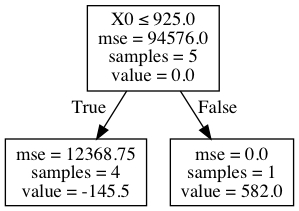

In [7]:
import pydotplus # must install with pip
t = L2Stump(df_l1.sqfeet, df_l2.res1)
print(t.split)

dot_data = StringIO()
tree.export_graphviz(t.tree_, dot_data, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


## Show decision tree for L1 residual

825.0


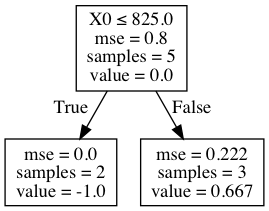

In [8]:
import pydotplus # must install with pip
t = L1Stump(df_l1.sqfeet, df_l1.sign1, df_l1.res1)
print(t.split)

dot_data = StringIO()
tree.export_graphviz(t.tree_, dot_data, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())